<a href="https://colab.research.google.com/github/NID123-CH/Pytorch-and-Image-Processing/blob/main/Copy_of_scratchpad_intuitions_about_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

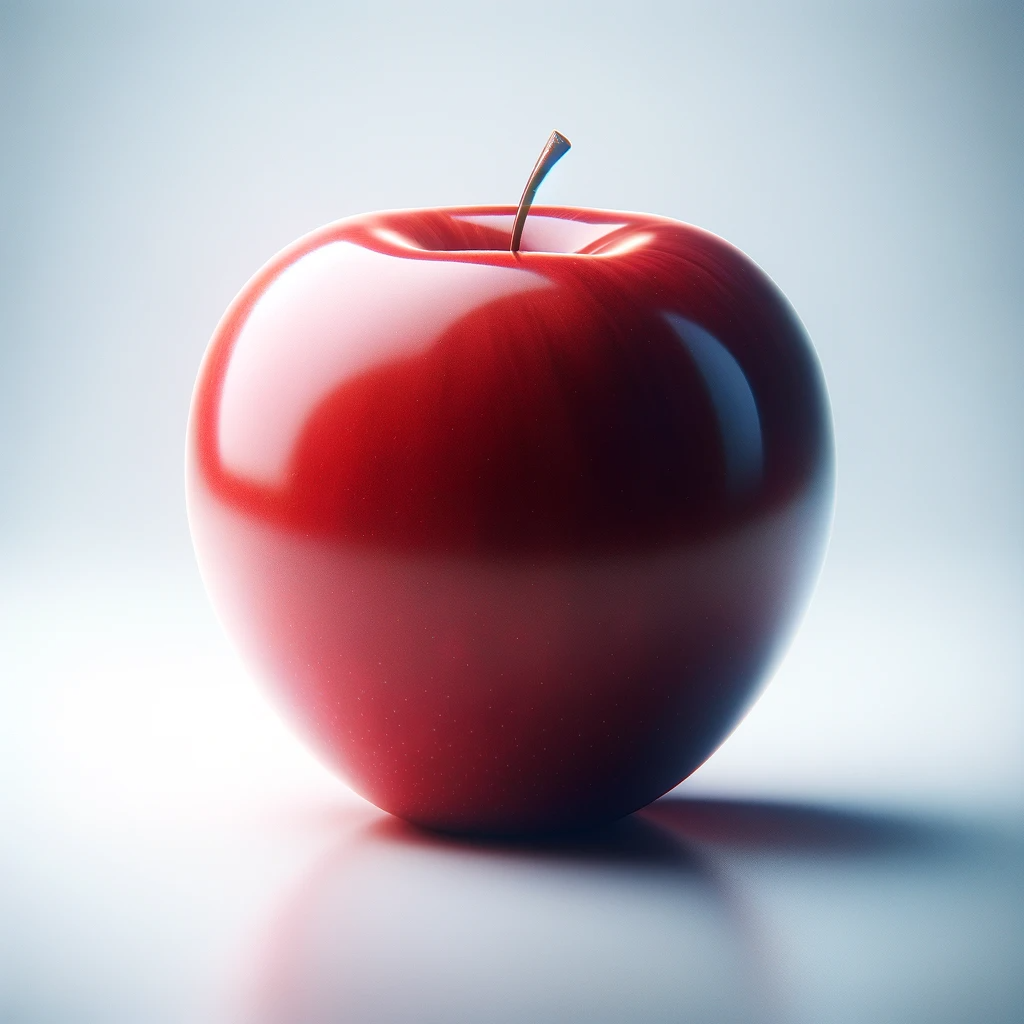

In [ ]:
import skimage.io as io
from PIL import Image

urls = ['https://github.com/andandandand/image-dataset-curation/blob/main/images/red_apple_1.png?raw=true',
        'https://github.com/andandandand/image-dataset-curation/blob/main/images/red_apple_2.png?raw=true',
        'https://github.com/andandandand/image-dataset-curation/blob/main/images/green_apple_1.png?raw=true',
        'https://github.com/andandandand/image-dataset-curation/blob/main/images/green_apple_2.png?raw=true',
        'https://github.com/andandandand/image-dataset-curation/blob/main/images/orange_1.png?raw=true',
        'https://github.com/andandandand/image-dataset-curation/blob/main/images/orange_2.png?raw=true',
        'https://github.com/andandandand/image-dataset-curation/blob/main/images/toy_car_1.png?raw=true',
        'https://github.com/andandandand/image-dataset-curation/blob/main/images/toy_car_2.png?raw=true']

imag_0 = Image.fromarray(io.imread(urls[0])).convert('RGB')
imag_0

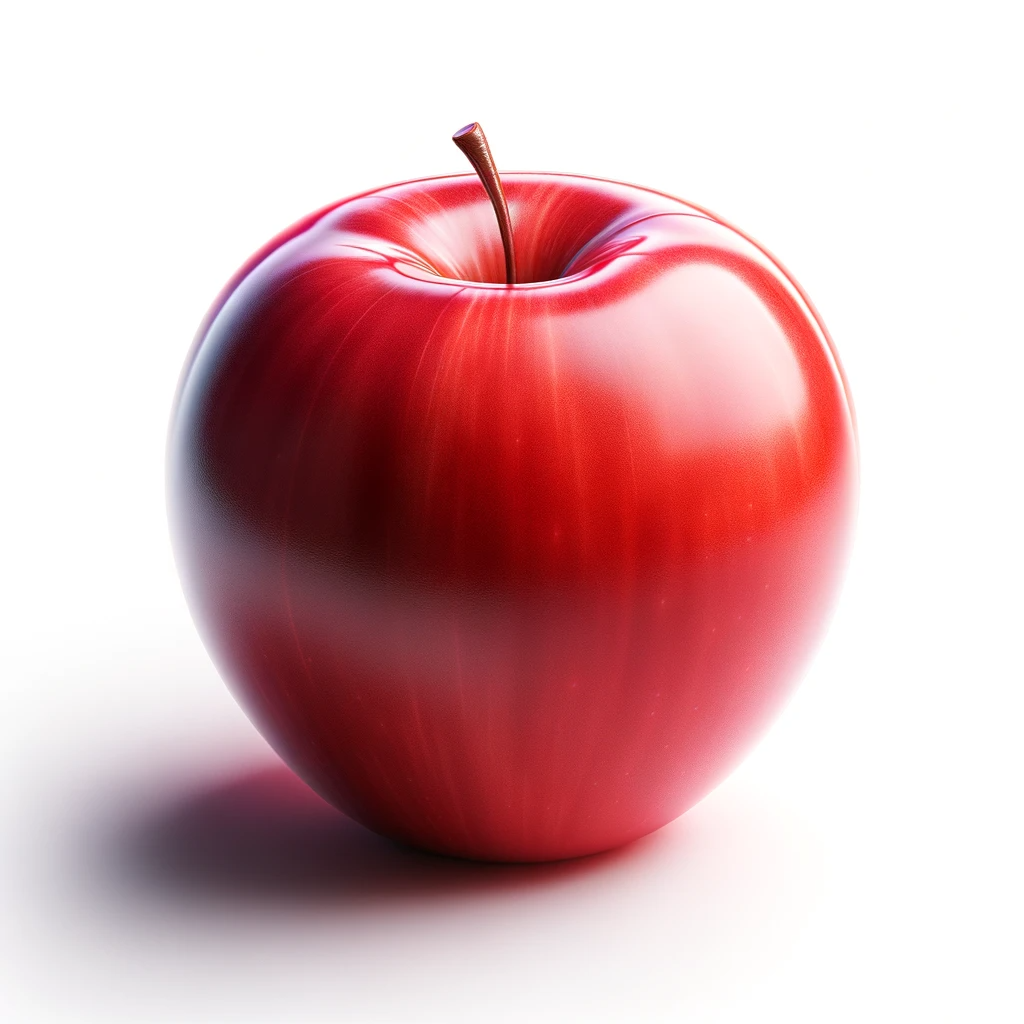

In [ ]:
imag_1 = Image.fromarray(io.imread(urls[1])).convert('RGB')
imag_1

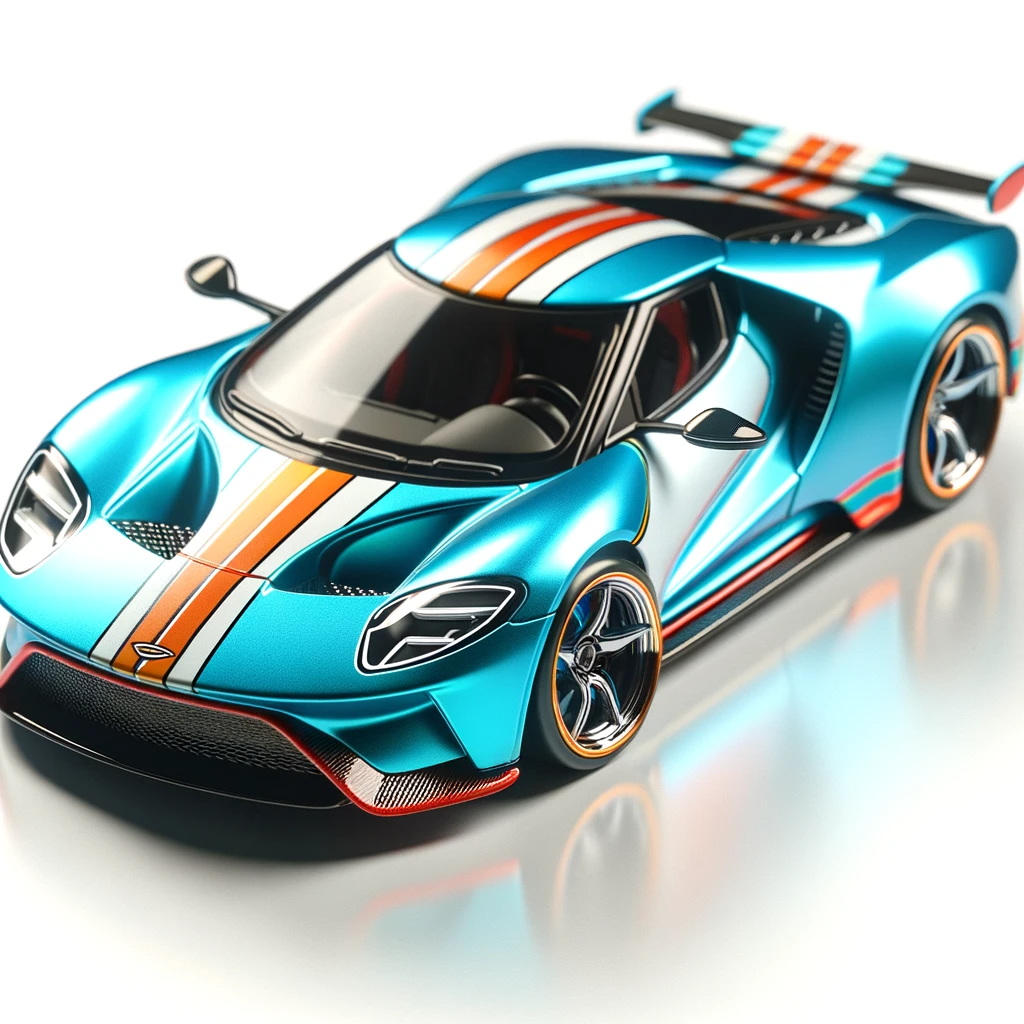

In [ ]:
imag_2 = Image.fromarray(io.imread(urls[-1])).convert('RGB')
imag_2

In [ ]:
# notice that raw.githubusercontent.com is also valid to access images from skimage.io
#another_url = 'https://raw.githubusercontent.com/aihpi/practical-computer-vision-with-pytorch/refs/heads/main/images/green_apple_1.png'

#io.imread(another_url)

In [ ]:
import torch
import torchvision.models as models
from torchvision.models import ResNet34_Weights

In [ ]:
# here we define the architecture and assign the pre-trained weights from Imagenet
model = models.resnet34(weights=ResNet34_Weights.IMAGENET1K_V1)
# if we don't do model.eval(), the output runs with batch normalization
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
dir(ResNet34_Weights)

['IMAGENET1K_V1', '__class__', '__doc__', '__members__', '__module__']

In [ ]:
transformation = ResNet34_Weights.IMAGENET1K_V1.transforms()
transformation

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

In [ ]:
tensor_0 = transformation(imag_0)
tensor_1 = transformation(imag_1)
tensor_2 = transformation(imag_2)
tensor_0.shape

torch.Size([3, 224, 224])

In [ ]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
last_conv_model = torch.nn.Sequential(*list(model.children())[:-2])

In [ ]:
with torch.no_grad():
  last_conv_output = last_conv_model(tensor_0.unsqueeze(0)).squeeze()

In [ ]:
last_conv_output.shape

torch.Size([512, 7, 7])

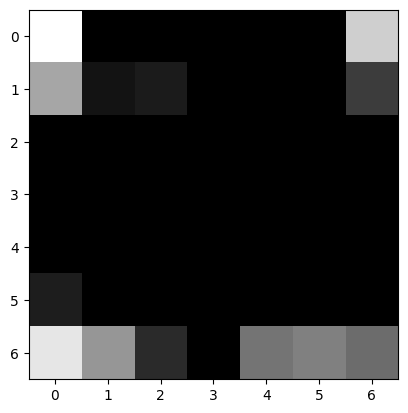

In [ ]:
 # @title {run:'auto'}
# @markdown Forms support many types of fields.
import matplotlib.pyplot as plt
slider_value = 91  # @param {type: "slider", min: 0, max: 511}
plt.imshow(last_conv_output[slider_value, : , :], cmap='gray');


In [ ]:
model.conv1.weight

Parameter containing:
tensor([[[[ 5.4109e-03, -6.9092e-03,  7.8839e-03,  ...,  4.9072e-02,
            3.0660e-02,  2.5398e-02],
          [ 4.1081e-02,  3.1296e-02,  3.2265e-02,  ...,  3.3145e-02,
            2.9754e-02,  4.1735e-02],
          [ 4.9519e-03, -3.1705e-02, -6.1310e-02,  ..., -9.7493e-02,
           -1.1601e-01, -1.2191e-01],
          ...,
          [-1.2287e-02, -2.4841e-02, -9.3052e-03,  ...,  1.7113e-02,
            2.4631e-03,  1.6726e-02],
          [ 3.9117e-03,  4.4537e-03,  3.6315e-02,  ...,  1.0371e-01,
            7.3973e-02,  5.9085e-02],
          [ 1.6784e-02,  8.8902e-03,  3.1312e-02,  ...,  9.6964e-02,
            8.3749e-02,  9.6970e-02]],

         [[-7.7192e-03, -8.7711e-03,  1.4143e-02,  ...,  3.3901e-02,
            2.5483e-02,  2.4275e-02],
          [ 5.3961e-02,  4.4677e-02,  3.4326e-02,  ...,  1.3392e-02,
            1.9135e-02,  3.7995e-02],
          [ 1.0251e-03, -5.4513e-02, -1.0225e-01,  ..., -1.9231e-01,
           -1.9994e-01, -1.8192e-01]

In [ ]:
index = 0
plt.imshow(convolved_images[0, : , :], cmap='gray')

In [ ]:
# @title {run:'auto'}
# @markdown Forms support many types of fields.

slider_value = 50  # @param {type: "slider", min: 0, max: 63}
plt.imshow(convolved_images[slider_value, : , :], cmap='gray')


In [ ]:
import matplotlib.pyplot as plt

plt.imshow(tensor_0.permute(1, 2, 0));

In [ ]:
plt.imshow(tensor_1.permute(1, 2, 0));

In [ ]:
plt.imshow(tensor_2.permute(1, 2, 0));

In [ ]:
# this unsqueeze(0) is so we add a batch dimension, the model needs it to process the image
tensor_0.unsqueeze(0).shape

In [ ]:
tensor_0.unsqueeze(1).shape

In [ ]:
with torch.no_grad():
  logits_0 = model(tensor_0.unsqueeze(0)).squeeze().numpy()
  logits_1 = model(tensor_1.unsqueeze(0)).squeeze().numpy()
  logits_2 = model(tensor_2.unsqueeze(0)).squeeze().numpy()


In [ ]:
# logits are already an 'embedding', why?
logits_0.shape

In [ ]:
#How can we compare embeddings?

import numpy as np
import skimage.io as io
from numpy import dot
from numpy.linalg import norm

def cosine_similarity(a, b):
  return dot(a, b)/(norm(a)*norm(b))

In [ ]:
cosine_similarity(logits_0, logits_1 )

In [ ]:
cosine_similarity(logits_0, logits_2)

## Extract embeddings from earlier layers of the model, with less activations

In [ ]:
cut_model = torch.nn.Sequential(*list(model.children())[:-1])
cut_model

In [ ]:
with torch.no_grad():
  early_logits_0 = cut_model(tensor_0.unsqueeze(0)).squeeze().numpy()
  early_logits_1 = cut_model(tensor_1.unsqueeze(0)).squeeze().numpy()
  early_logits_2 = cut_model(tensor_2.unsqueeze(0)).squeeze().numpy()

In [ ]:
early_logits_0.shape

In [ ]:
cosine_similarity(early_logits_0, early_logits_1)

In [ ]:
cosine_similarity(early_logits_0, early_logits_2)

## Extract all embeddings

In [ ]:
# Function to extract embeddings from an image
def extract_embedding(image_path):
    image = Image.fromarray(io.imread(image_path)).convert("RGB")
    image = transform(image).unsqueeze(0)  # Add batch dimension
    with torch.no_grad():
        embedding = model(image)
    return embedding.squeeze().numpy()

In [ ]:
embeddings = {url:extract_embedding(url) for url in urls}

images = [Image.fromarray(io.imread(url)).convert('RGB') for url in urls]

In [ ]:
# Import required libraries
from PIL import Image
import torch
import torchvision.transforms as transforms
from torch.utils.tensorboard import SummaryWriter

# Initialize an empty list to store the thumbnail images
thumbnail_images = []

# Define the size for the thumbnails
thumbnail_size = (32, 32)

# Initialize transformations
transform = transforms.Compose([
    transforms.ToTensor(),
])

# Loop over each image path to open, resize, and append to the list
for img in images:
    img = img.resize(thumbnail_size)  # Explicitly resize the image
    thumbnail_images.append(img)

# Convert thumbnail images to PyTorch tensors
thumbnail_tensors = torch.stack([transform(img) for img in thumbnail_images])

# Convert embeddings to a PyTorch tensor
embeddings_tensor = torch.stack([torch.tensor(emb) for emb in embeddings.values()])

# Initialize a SummaryWriter
writer = SummaryWriter('runs/paintings_embeddings_experiment')

# Add embeddings and thumbnails to the writer
writer.add_embedding(
    embeddings_tensor,
    label_img=thumbnail_tensors,
    global_step=1,
    tag='paintings_embeddings'
)

# Close the writer
writer.close()

In [ ]:
# You will need to evaluate this cell at least twice
%load_ext tensorboard
%tensorboard --logdir runs
